In [6]:
import pandas as pd
import seaborn as sns

In [64]:
#FASTA metadata upload, faster version of the one in the masterthesis
exclude = [i for i, line in enumerate(open('A.fasta')) if not line.startswith('>')]
metadata = pd.read_csv('A.fasta', skiprows = exclude, sep = '|', na_filter = False, header = None)
metadata.columns = ['accession', 'strain', 'segment', 'protein', 'genus', 'subtype', 'date', 'host', 'curation']

In [61]:
#upload cluster dataframe, join to metadata minus equivalent segment column
cluster = pd.read_csv('cluster.csv', sep = ',', na_filter = False, header = 0, index_col = 0)
intersection = set(metadata.columns) & set(cluster.columns)
classification = cluster.join(metadata.set_index('accession').drop(columns=list(intersection), axis=1))

In [62]:
#number of unique values and dictionary of unique values
number = classification.nunique(axis=0)
names = pd.Series({c: classification[c].unique() for c in classification})

In [67]:
#which column to use as vector
components = names['host']

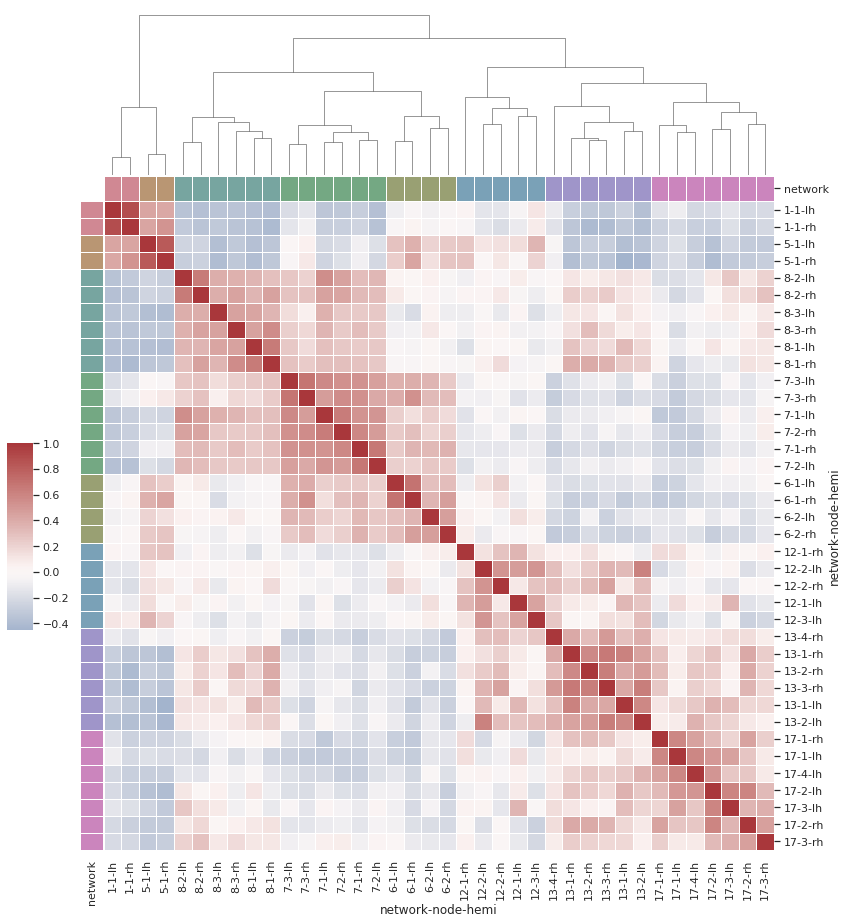

In [68]:
#example 
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()